In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [129]:
# read the csv file for reandom forest regression, now DON'T TOUCH IT!
df = pd.read_csv("C:/Users/Utente/Documents/Excel/world_gdp_data.csv", encoding='latin1')

In [ ]:
# csv file divided into continents, DON'T TOUCH IT!
# divide by continent
continents = {
    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia",
             "China, People's Republic of", "Georgia", "Hong Kong SAR", "India", "Indonesia", "Iran", "Iraq", "Israel",
             "Japan", "Jordan", "Kazakhstan", "Korea, Republic of", "Kuwait", "Kyrgyz Republic", "Lao P.D.R.", "Lebanon",
             "Macao SAR", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Philippines",
             "Qatar", "Saudi Arabia", "Singapore", "Sri Lanka", "Syria", "Taiwan Province of China", "Tajikistan",
             "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "West Bank and Gaza", "Yemen"],
    "Europe": ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
               "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia",
               "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein",
               "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
               "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovak Republic", "Slovenia",
               "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"],
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
               "Chad", "Comoros", "Congo, Dem. Rep. of the", "Congo, Republic of the", "Côte d'Ivoire", "Djibouti", "Egypt", "Equatorial Guinea",
               "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya",
               "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe",
               "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan, Republic of", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
               "Zambia", "Zimbabwe"],
    "North America": ["Antigua and Barbuda", "Bahamas, The", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic",
                      "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
                      "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia, Fed. States of", "Nauru", "New Zealand", "Palau", "Papua New Guinea",
                "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

df['Continent'] = df['country_name'].apply(lambda x: next((continent for continent, countries in continents.items() if x in countries), None))
# Removed the repeated and incorrectly indented 'continents' dictionary definition here
   


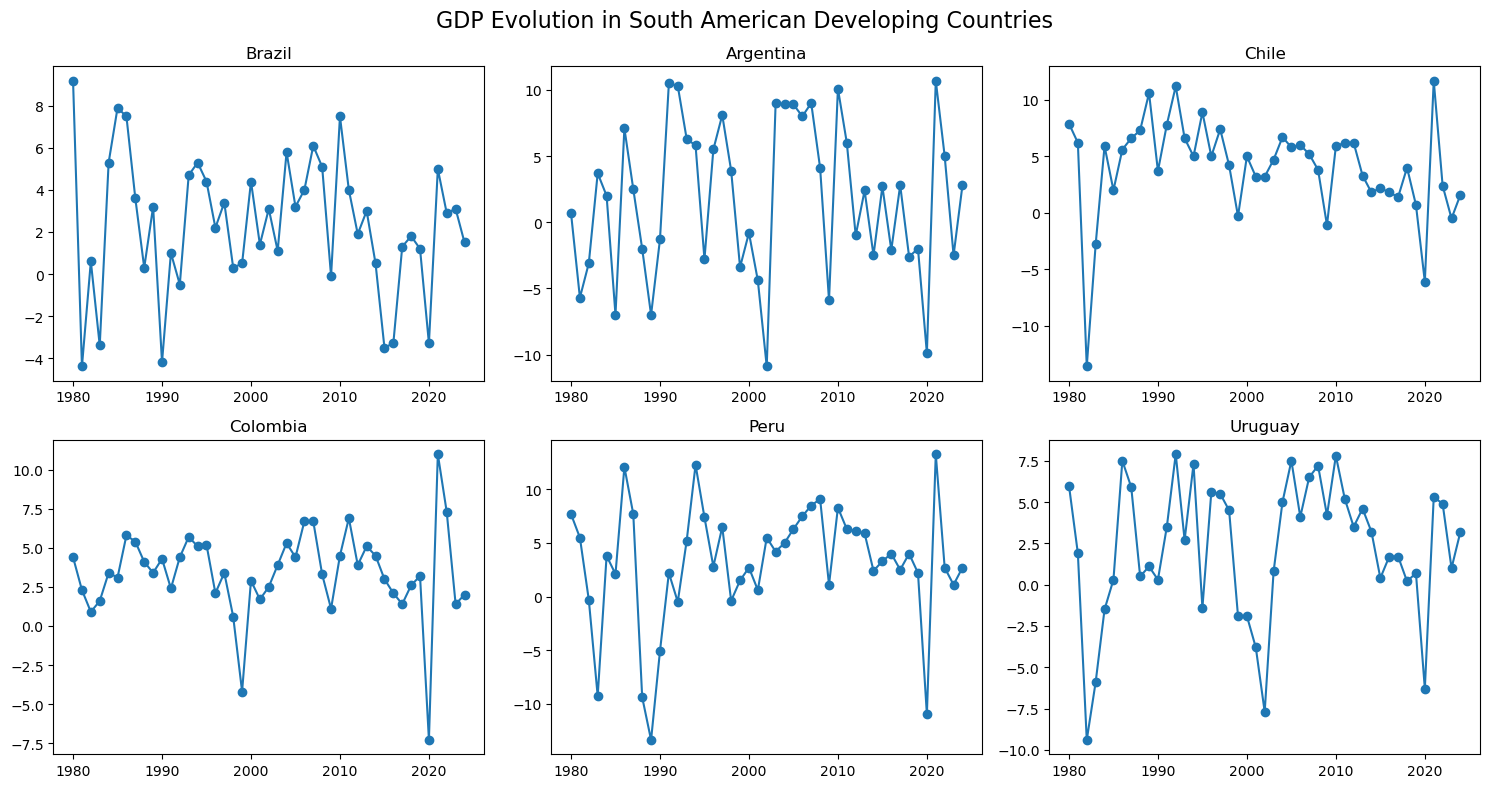

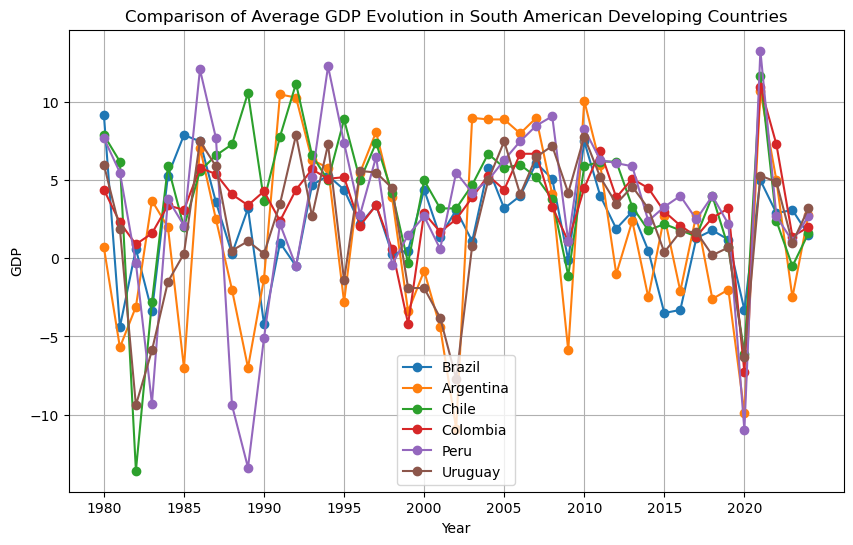

In [ ]:
# i've chosen these 6 countries because they are the most developed in south america, and i want to see how their gdp evolved over the years
south_american_countries = ["Brazil", "Argentina", "Chile", "Colombia", "Peru", "Uruguay"]


plt.figure(figsize=(15, 8))
for i, country in enumerate(south_american_countries, start=1):

    plt.subplot(2, 3, i)
    df_country = df[df['country_name'] == country]
    years = df.columns[2:-1]  # Exclude the last column ('Continent')
    gdp_values = df_country.iloc[:, 2:-1].values.flatten()  # Exclude the 'Continent' column
    plt.plot(years, gdp_values, marker='o')
    plt.xticks(years[::10])    
    plt.title(country)
plt.suptitle('GDP Evolution in South American Developing Countries', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for country in south_american_countries:
    df_country = df[df['country_name'] == country]
    years = df.columns[2:-1]  # Exclude the last column ('Continent')
    gdp_values = df_country.iloc[:, 2:-1].mean(axis=0, skipna=True)  # Exclude the 'Continent' column
    plt.plot(years, gdp_values, marker='o', label=country)

plt.title('Comparison of Average GDP Evolution in South American Developing Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()  
plt.xticks(years[::5])
plt.grid(True) 
plt.show()


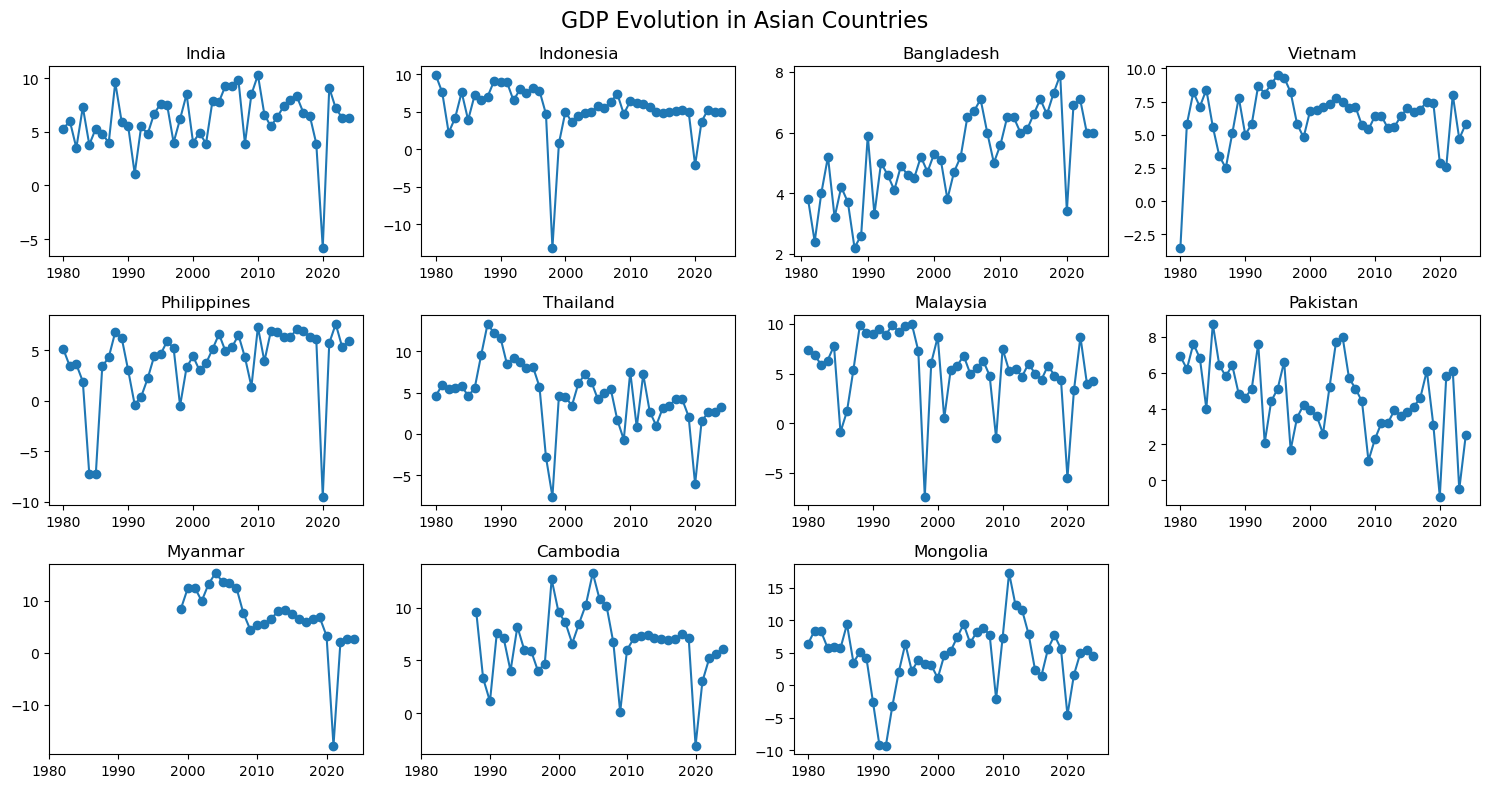

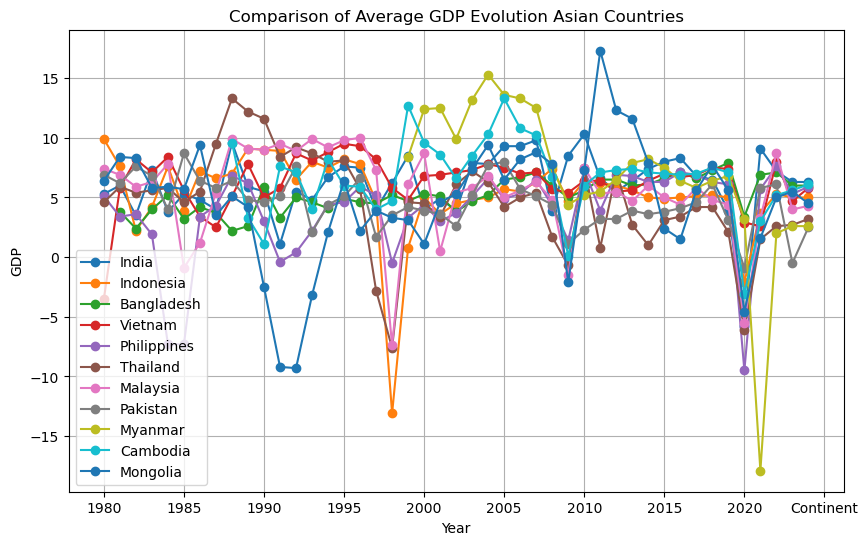

In [ ]:
# same for these 10 countries in asia, i chose them because they are the most interesting in asia, and i want to see how their gdp evolved over the years
asian_countries = ["India","Indonesia","Bangladesh","Vietnam","Philippines","Thailand","Malaysia","Pakistan","Myanmar","Cambodia","Mongolia"]


plt.figure(figsize=(15, 8))
for i, country in enumerate(asian_countries, start=1):

    plt.subplot(3, 4, i)
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].values.flatten()
    if gdp_values.size > 0:  # Check if gdp_values is not empty
        plt.plot(years, gdp_values, marker='o')
    else:
        print(f"No GDP data available for {country}")
    plt.xticks(years[::10])    
    plt.title(country)
plt.suptitle('GDP Evolution in Asian Countries', fontsize=16)
plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
for country in asian_countries:
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].mean(axis=0, skipna=True)
    plt.plot(years, gdp_values, marker='o', label=country)

plt.title('Comparison of Average GDP Evolution Asian Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()  
plt.xticks(years[::5])
plt.grid(True) 
plt.show()


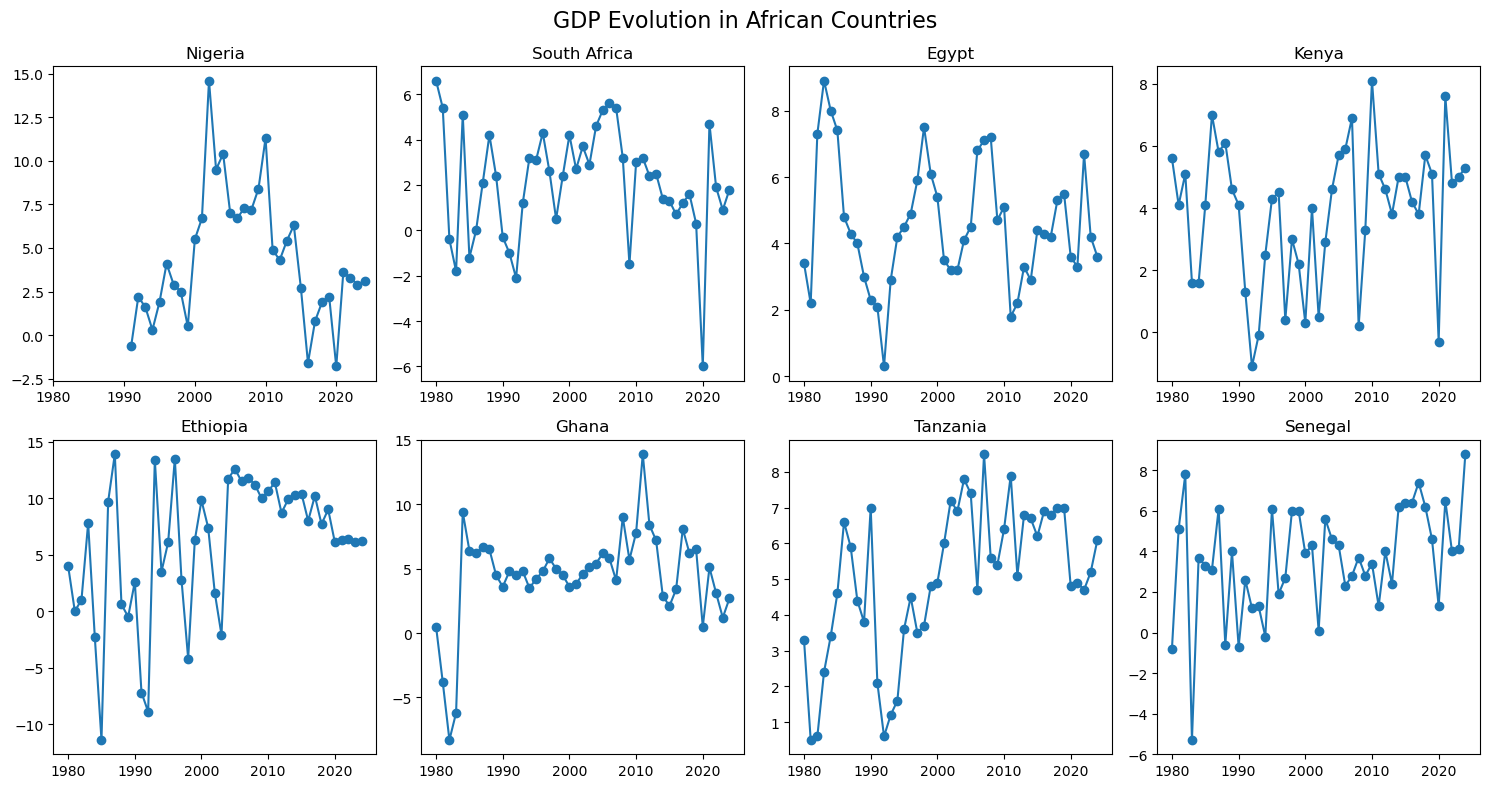

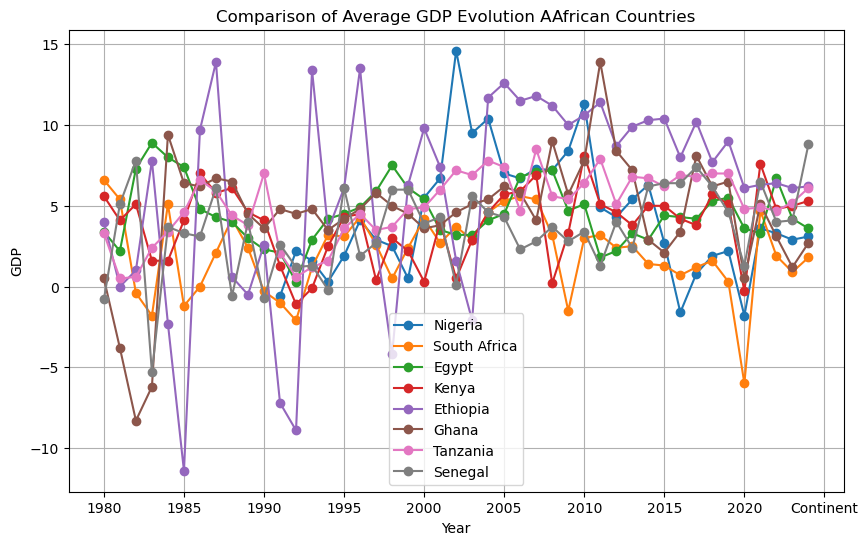

In [ ]:
# same for africa 
african_countries = ["Nigeria","South Africa","Egypt","Kenya","Ethiopia","Ghana","Tanzania","Senegal"]


plt.figure(figsize=(15, 8))
for i, country in enumerate(african_countries, start=1):

    plt.subplot(2, 4, i)
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].values.flatten()
    plt.plot(years, gdp_values, marker='o')
    plt.xticks(years[::10])    
    plt.title(country)
plt.suptitle('GDP Evolution in African Countries', fontsize=16)
plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
for country in african_countries:
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].mean(axis=0, skipna=True)
    plt.plot(years, gdp_values, marker='o', label=country)

plt.title('Comparison of Average GDP Evolution AAfrican Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()  
plt.xticks(years[::5])
plt.grid(True) 
plt.show()


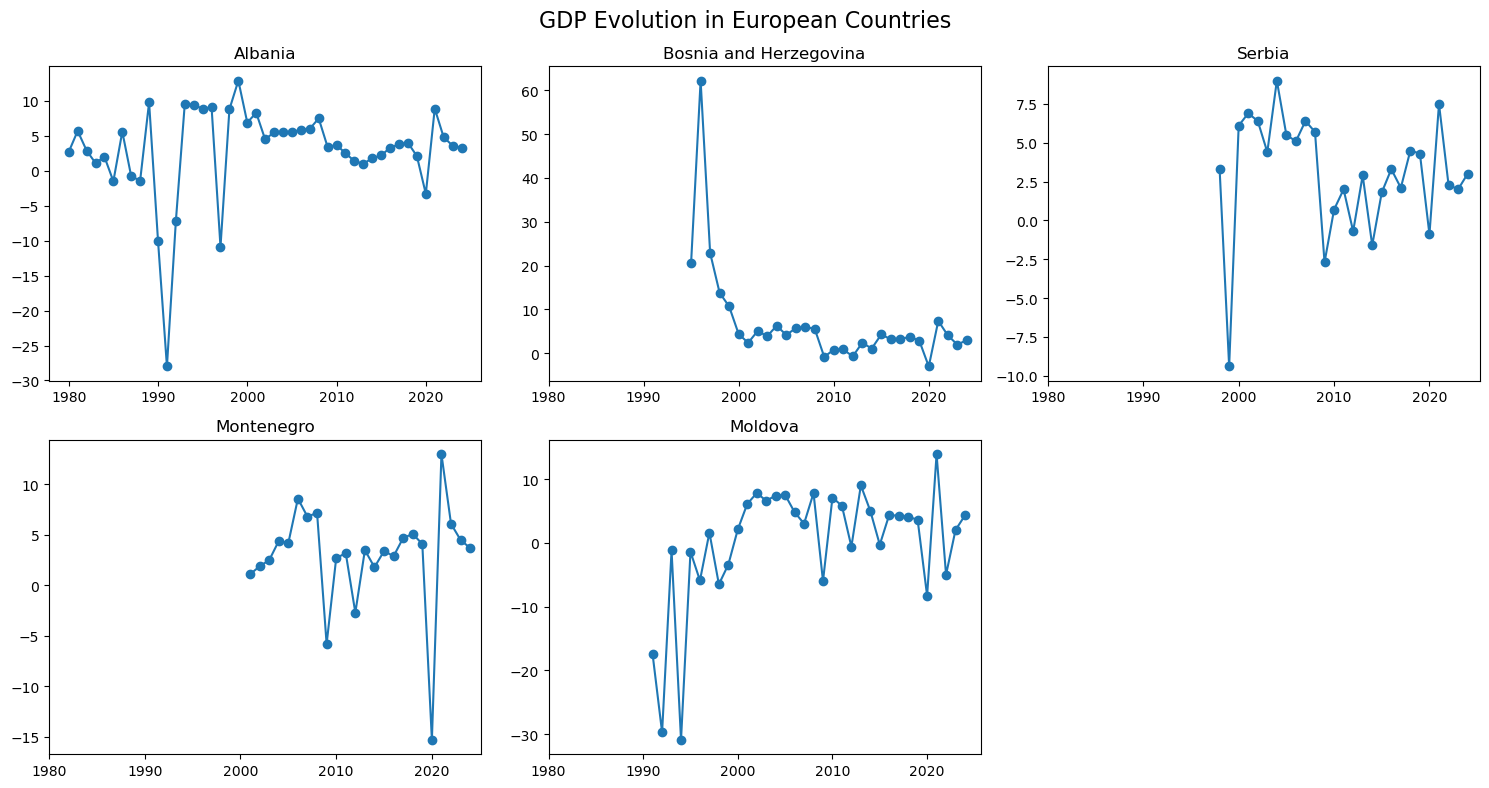

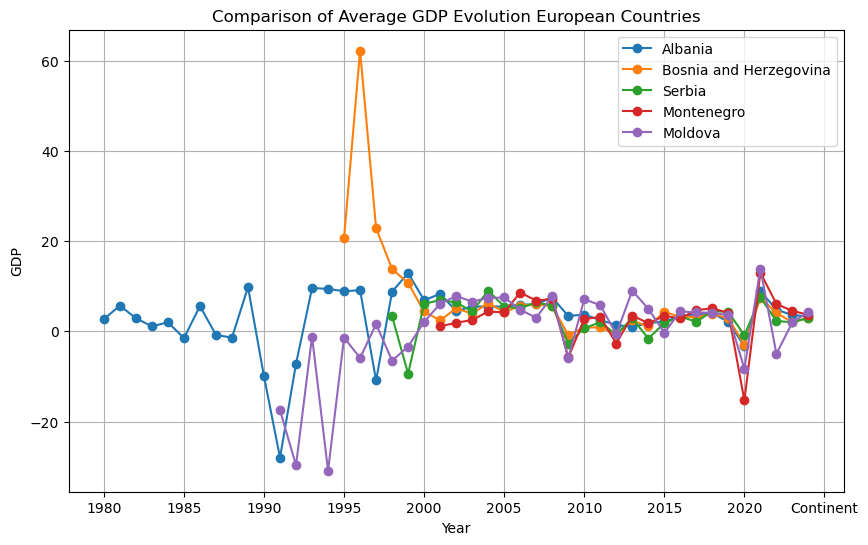

In [ ]:
# same for europe, but maybe i need to contestualize how these countries have been chosen
european_countries = ["Albania","Bosnia and Herzegovina","Serbia","Montenegro","Moldova"]


plt.figure(figsize=(15, 8))
for i, country in enumerate(european_countries, start=1):

    plt.subplot(2, 3, i)
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].values.flatten()
    if gdp_values.size > 0:  # Check if gdp_values is not empty
        plt.plot(years, gdp_values, marker='o')
    else:
        print(f"No GDP data available for {country}")
    plt.xticks(years[::10])    
    plt.title(country)
plt.suptitle('GDP Evolution in European Countries', fontsize=16)
plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
for country in european_countries:
    df_country = df[df['country_name'] == country]
    years = df.columns[2:]
    gdp_values = df_country.iloc[:, 2:].mean(axis=0, skipna=True)
    plt.plot(years, gdp_values, marker='o', label=country)

plt.title('Comparison of Average GDP Evolution European Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()  
plt.xticks(years[::5])
plt.grid(True) 
plt.show()

In [137]:
# Define the continents and their respective countries
continents_to_predict = {
    "Asia": asian_countries,
    "Africa": african_countries,
    "Europe": european_countries,
    "South America": south_american_countries
}

# Initialize a dictionary to store predictions
continent_predictions = {}

# Loop through each continent and predict GDP values
for continent, countries in continents_to_predict.items():
    continent_predictions[continent] = {}
    for country in countries:
        # Filter data for the specific country
        country_data = df[df['country_name'] == country]
        if country_data.empty:
            print(f"No data available for {country} in {continent}")
            continue
        
        # Extract years and GDP values
        years = country_data.columns[2:-1]  # Exclude 'country_name', 'indicator_name', and 'Continent'
        gdp_values = country_data.iloc[:, 2:-1].values.flatten()  # Exclude 'Continent' column
        
        # Prepare features and target
        features = np.array([[int(year), gdp] for year, gdp in zip(years, gdp_values) if not np.isnan(gdp)])
        if features.size == 0:
            print(f"Insufficient data for {country} in {continent}")
            continue
        X = features[:, 0].reshape(-1, 1)  # Years as features
        y = features[:, 1]  # GDP values as target
        
        # Train Random Forest model
        rf_regressor = RandomForestRegressor(random_state=42)
        rf_regressor.fit(X, y)
        
        # Predict future GDP values (e.g., for 2025, 2026, 2027)
        future_years = np.array([[2025], [2026], [2027]])
        predictions = rf_regressor.predict(future_years)
        
        # Store predictions
        continent_predictions[continent][country] = predictions

# Display predictions
for continent, countries in continent_predictions.items():
    print(f"Predictions for {continent}:")
    for country, predictions in countries.items():
        print(f"{country}: {predictions}")

Predictions for Asia:
India: [6.466 6.466 6.466]
Indonesia: [4.966 4.966 4.966]
Bangladesh: [6.11 6.11 6.11]
Vietnam: [5.54 5.54 5.54]
Philippines: [5.85 5.85 5.85]
Thailand: [2.976 2.976 2.976]
Malaysia: [4.452 4.452 4.452]
Pakistan: [2.128 2.128 2.128]
Myanmar: [2.397 2.397 2.397]
Cambodia: [5.89 5.89 5.89]
Mongolia: [4.654 4.654 4.654]
Predictions for Africa:
Nigeria: [3.02 3.02 3.02]
South Africa: [1.706 1.706 1.706]
Egypt: [3.918 3.918 3.918]
Kenya: [5.29 5.29 5.29]
Ethiopia: [6.192 6.192 6.192]
Ghana: [2.46 2.46 2.46]
Tanzania: [5.752 5.752 5.752]
Senegal: [7.292 7.292 7.292]
Predictions for Europe:
Albania: [3.686 3.686 3.686]
Bosnia and Herzegovina: [2.745 2.745 2.745]
Serbia: [2.832 2.832 2.832]
Montenegro: [3.907 3.907 3.907]
Moldova: [2.58 2.58 2.58]
Predictions for South America:
Brazil: [2.108 2.108 2.108]
Argentina: [1.976 1.976 1.976]
Chile: [1.548 1.548 1.548]
Colombia: [2.534 2.534 2.534]
Peru: [2.74 2.74 2.74]
Uruguay: [2.858 2.858 2.858]
